1.) Import calculated geometrical features

In [16]:
workdir<-'/home/komazsofi/Munka/Heidelberg/DAAD_helios_sim/Data2/'
filename<-'Sim_obj_geom_fea.txt'
feature='var_z'

sim_data = read.csv(paste(workdir,filename,sep=''),head=FALSE,col.names = c('filename','platform','treemodellid','shape','scanposition','mean_z','median_z','var_z','std_z','coeffvar_z','skew_z','kurto_z','returns'))
filt_sim_data=sim_data[sim_data$returns == "all", ]

filt_sim_data=filt_sim_data[which(filt_sim_data$treemodellid == "PH2" | filt_sim_data$treemodellid == "PH5"), ]
filt_sim_data 

feature_data=filt_sim_data[c('mean_z','median_z','var_z','std_z','coeffvar_z','skew_z','kurto_z')]
platform_sim_data=filt_sim_data[c('platform')]
shape_sim_data=filt_sim_data[c('shape')]

feature_anal_data=filt_sim_data[c('treemodellid','platform',feature)]

library(reshape)

orderbyplatform_data=cast(feature_anal_data, treemodellid ~ platform, value=feature)
orderbyplatform_data

,filename,platform,treemodellid,shape,scanposition,mean_z,median_z,var_z,std_z,coeffvar_z,skew_z,kurto_z,returns
1,ALS_PH2leg000_points.xyz,ALS,PH2,spherical,0,17.69271,17.373,24.49817,4.949563,0.2797516,0.10763699,-0.3199496,all
3,ALS_PH5leg000_points.xyz,ALS,PH5,spherical,0,16.88155,16.685,16.21997,4.027402,0.2385682,0.23512342,-0.2665923,all
13,MLS_PH2leg000_points.xyz,MLS,PH2,spherical,0,16.62719,16.283,38.57442,6.210831,0.3735346,0.05845616,-0.3612532,all
15,MLS_PH5leg000_points.xyz,MLS,PH5,spherical,0,14.89292,14.765,33.73553,5.808230,0.3899993,0.06842107,-0.4682684,all
25,TLS_PH2leg000_points.xyz,TLS,PH2,spherical,0,16.96129,16.576,37.81830,6.149658,0.3625703,0.16646325,-0.4679967,all
27,TLS_PH5leg000_points.xyz,TLS,PH5,spherical,0,15.33475,15.045,34.06640,5.836643,0.3806154,0.06755333,-0.6036430,all
37,ULS_PH2leg000_points.xyz,ULS,PH2,spherical,0,18.14162,17.970,27.07050,5.202931,0.2867953,0.03228741,-0.3870108,all
39,ULS_PH5leg000_points.xyz,ULS,PH5,spherical,0,17.15151,17.178,19.91708,4.462855,0.2602018,-0.09240832,-0.3464633,all


treemodellid,ALS,MLS,TLS,ULS
PH2,24.49817,38.57442,37.8183,27.07050
PH5,16.21997,33.73553,34.0664,19.91708


2.) Correlation analysis

In [17]:
fea_corr=cor(orderbyplatform_data)
fea_corr

,ALS,MLS,TLS,ULS
ALS,1,1,1,1
MLS,1,1,1,1
TLS,1,1,1,1
ULS,1,1,1,1


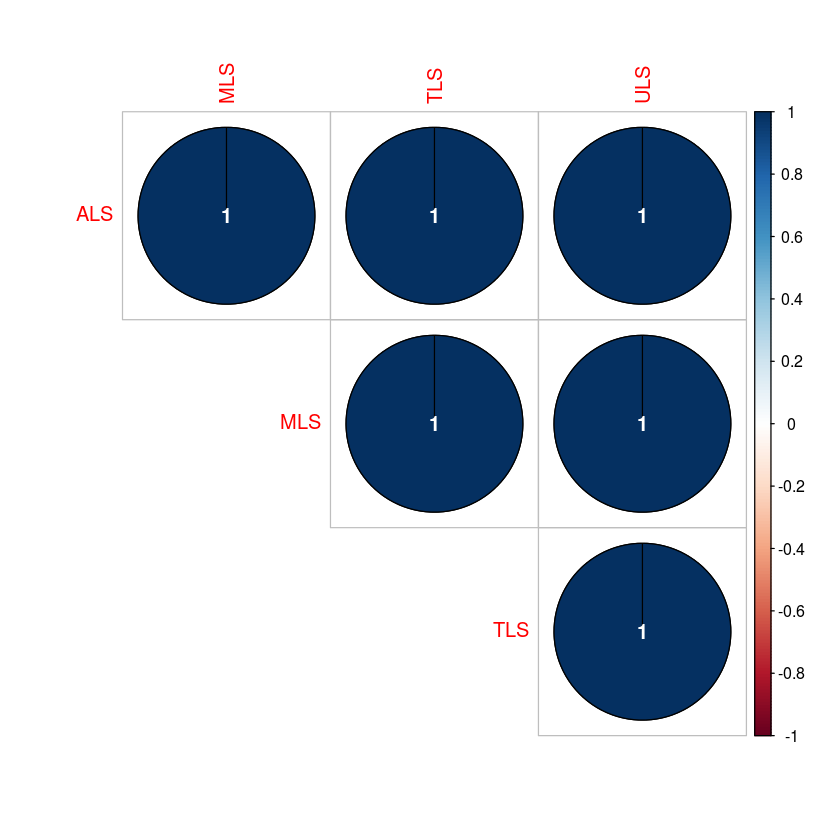

In [13]:
library(corrplot)

corrplot(fea_corr, method="pie",type="upper",addCoef.col = "white",diag=FALSE)

3.) Gini impurity

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(x = feature_data[, 1:7], y = platform_sim_data[,      1], ntree = 25, nodesize = 5, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 25
No. of variables tried at each split: 2

        OOB estimate of  error rate: 79.17%
Confusion matrix:
    ALS MLS TLS ULS class.error
ALS   3   0   1   2   0.5000000
MLS   1   0   4   1   1.0000000
TLS   1   2   1   2   0.8333333
ULS   3   0   2   1   0.8333333

,ALS,MLS,TLS,ULS,MeanDecreaseAccuracy,MeanDecreaseGini
mean_z,0.0000000,1.020621,0.0000000,-1.0206207,0.00000000,0.6464069
median_z,-0.2777778,-1.360828,0.4490133,1.0206207,0.07467043,1.1447988
var_z,0.0000000,1.020621,-1.0206207,-1.0206207,-0.41552656,0.9296304
std_z,1.0206207,-1.443376,-1.7677670,-1.8144368,-2.56581817,1.1080817
coeffvar_z,1.0206207,1.020621,0.4134884,0.2777778,0.98517984,1.5748931
skew_z,2.0412415,0.000000,1.3927150,1.0206207,2.55087752,2.4973623
kurto_z,1.3074409,0.000000,1.0744306,-0.2001602,0.97212150,1.9603558


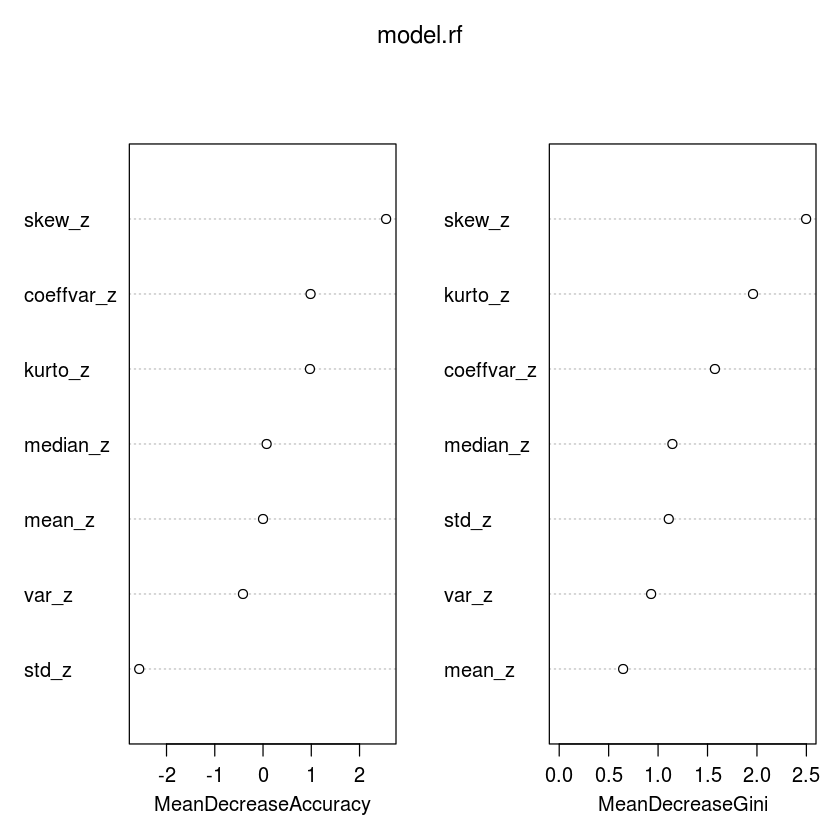

In [4]:
library(randomForest)

model.rf <- randomForest(feature_data[,1:7],platform_sim_data[,1], ntree=25,importance=TRUE, nodesize=5)
model.rf
varImpPlot(model.rf)

importance(model.rf)